In [ ]:
#Standarisation using the titanic dataset
#z index based scaling
import numpy as np
import pandas as pd
import os
# for dirname, _, filenames in os.walk('/kaggle/input/titanicdataset-traincsv'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
df = pd.read_csv('/content/train.csv', usecols=['Pclass', 'Age', 'Fare', 'Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


**1. Standardization / Z-Score**
Where all features and variables are brought to a similar scale. By centering the variables at zero.

Formula:
z = (x - (x_mean))/std

This is done through

In [ ]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [ ]:
#Performing standardization
#Using StandardScaler from Scikit-Learn

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [ ]:
df_scaled = scalar.fit_transform(df)
df_scaled

array([[-0.78927234,  0.82737724, -0.53037664, -0.50244517],
       [ 1.2669898 , -1.56610693,  0.57183099,  0.78684529],
       [ 1.2669898 ,  0.82737724, -0.25482473, -0.48885426],
       ...,
       [-0.78927234,  0.82737724,         nan, -0.17626324],
       [ 1.2669898 , -1.56610693, -0.25482473, -0.04438104],
       [-0.78927234,  0.82737724,  0.15850313, -0.49237783]])

In [ ]:
pd.DataFrame(df_scaled)

,0,1,2,3
0,-0.789272,0.827377,-0.530377,-0.502445
1,1.266990,-1.566107,0.571831,0.786845
2,1.266990,0.827377,-0.254825,-0.488854
3,1.266990,-1.566107,0.365167,0.420730
4,-0.789272,0.827377,0.365167,-0.486337
...,...,...,...,...
886,-0.789272,-0.369365,-0.185937,-0.386671
887,1.266990,-1.566107,-0.737041,-0.044381
888,-0.789272,0.827377,NaN,-0.176263
889,1.266990,-1.566107,-0.254825,-0.044381


The transformation is taking placed based on each distinct field

(array([40., 14., 15., 31., 79., 98., 85., 84., 73., 45., 35., 35., 29.,
        16., 13., 11.,  4.,  5.,  1.,  1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <BarContainer object of 20 artists>)

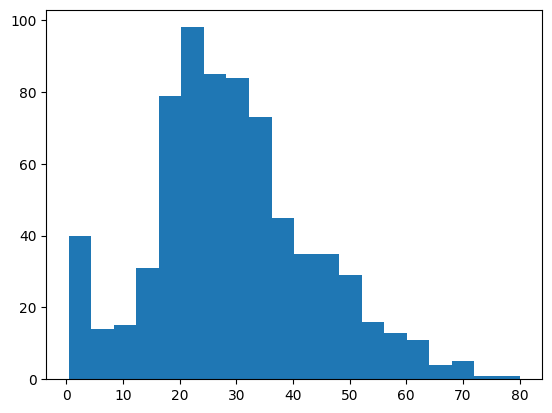

In [ ]:
plt.hist(df['Age'],bins=20)

(array([40., 14., 15., 31., 79., 98., 85., 84., 73., 45., 35., 35., 29.,
        16., 13., 11.,  4.,  5.,  1.,  1.]),
 array([-2.01697919, -1.74287393, -1.46876867, -1.1946634 , -0.92055814,
        -0.64645288, -0.37234762, -0.09824236,  0.1758629 ,  0.44996816,
         0.72407342,  0.99817868,  1.27228395,  1.54638921,  1.82049447,
         2.09459973,  2.36870499,  2.64281025,  2.91691551,  3.19102077,
         3.46512604]),
 <BarContainer object of 20 artists>)

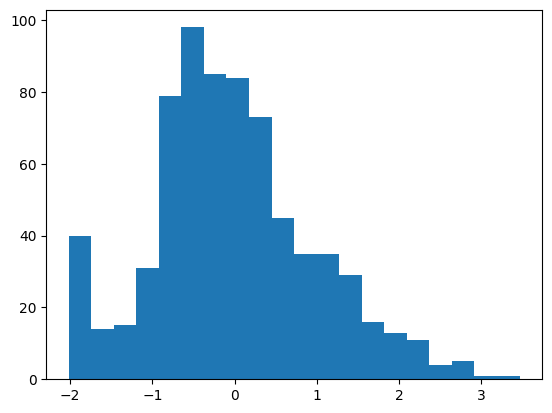

In [ ]:
plt.hist(df_scaled[:,2],bins=20)

**2. MinMax Scaling**
Aim of this scaling is to transform/scale the values between 0 to 1 / 0 and 1 Works well with DL techniques such as CNN

X_scaled = ((X - X.min) / (X.max-X.min))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df_min_max = pd.DataFrame(min_max.fit_transform(df), columns=df.columns)
df_min_max

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713
...,...,...,...,...
886,0.0,0.5,0.334004,0.025374
887,1.0,0.0,0.233476,0.058556
888,0.0,1.0,NaN,0.045771
889,1.0,0.0,0.321438,0.058556


(array([40., 14., 15., 31., 79., 98., 85., 84., 73., 45., 35., 35., 29.,
        16., 13., 11.,  4.,  5.,  1.,  1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

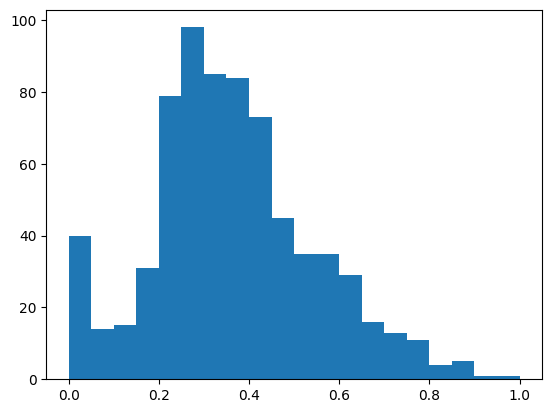

In [ ]:
plt.hist(df_min_max['Age'],bins=20)

**3. Mean Normalised**

Formula: X(scaled)= (X *i* - X *mean*)/ Standard Deviation

In [ ]:
df_mean_normalized = (df - df.mean()) / df.std()
print(df_mean_normalized)

     Survived    Pclass       Age      Fare
0   -0.788829  0.826913 -0.530005 -0.502163
1    1.266279 -1.565228  0.571430  0.786404
2    1.266279  0.826913 -0.254646 -0.488580
3    1.266279 -1.565228  0.364911  0.420494
4   -0.788829  0.826913  0.364911 -0.486064
..        ...       ...       ...       ...
886 -0.788829 -0.369158 -0.185807 -0.386454
887  1.266279 -1.565228 -0.736524 -0.044356
888 -0.788829  0.826913       NaN -0.176164
889  1.266279 -1.565228 -0.254646 -0.044356
890 -0.788829  0.826913  0.158392 -0.492101

[891 rows x 4 columns]


(array([40., 14., 15., 31., 79., 98., 85., 84., 73., 45., 35., 35., 29.,
        16., 13., 11.,  4.,  5.,  1.,  1.]),
 array([-2.01556624, -1.741653  , -1.46773976, -1.19382651, -0.91991327,
        -0.64600003, -0.37208678, -0.09817354,  0.1757397 ,  0.44965295,
         0.72356619,  0.99747944,  1.27139268,  1.54530592,  1.81921917,
         2.09313241,  2.36704565,  2.6409589 ,  2.91487214,  3.18878538,
         3.46269863]),
 <BarContainer object of 20 artists>)

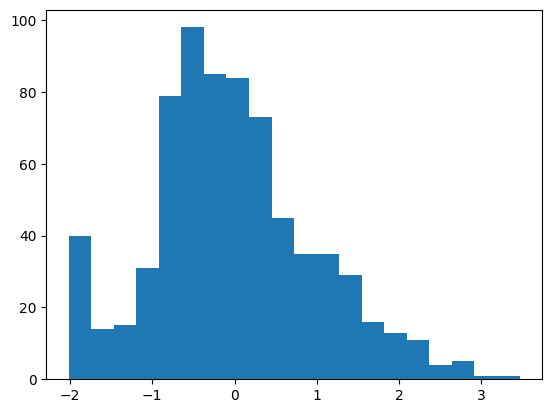

In [ ]:
plt.hist(df_mean_normalized['Age'],bins=20)

**4. Max Absolute Scaling:**

Formula:
**X**(scaled)- **X** /max(|**X**|)

     Survived    Pclass       Age      Fare
0         0.0  1.000000  0.275000  0.014151
1         1.0  0.333333  0.475000  0.139136
2         1.0  1.000000  0.325000  0.015469
3         1.0  0.333333  0.437500  0.103644
4         0.0  1.000000  0.437500  0.015713
..        ...       ...       ...       ...
886       0.0  0.666667  0.337500  0.025374
887       1.0  0.333333  0.237500  0.058556
888       0.0  1.000000  0.371239  0.045771
889       1.0  0.333333  0.325000  0.058556
890       0.0  1.000000  0.400000  0.015127

[891 rows x 4 columns]


(array([ 40.,  14.,  15.,  31.,  79.,  98.,  85., 261.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([0.00525  , 0.0549875, 0.104725 , 0.1544625, 0.2042   , 0.2539375,
        0.303675 , 0.3534125, 0.40315  , 0.4528875, 0.502625 , 0.5523625,
        0.6021   , 0.6518375, 0.701575 , 0.7513125, 0.80105  , 0.8507875,
        0.900525 , 0.9502625, 1.       ]),
 <BarContainer object of 20 artists>)

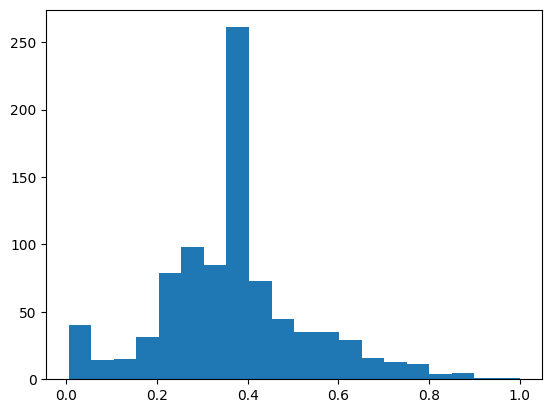

In [ ]:
# max Absolute
from sklearn import preprocessing
df_max_abs_scaled = df / df.abs().max()
print(df_max_abs_scaled)
plt.hist(df_max_abs_scaled['Age'], bins=20)


**5. Robust Scaler**
Used to scale features according to median and quantiles (IQR)

Best in presence of outliers.

IQR = Q3 - Q1 X_scaled = (X-X.median)/IQR

     Survived  Pclass       Age      Fare
0         0.0     0.0 -0.592240 -0.312011
1         1.0    -2.0  0.638529  2.461242
2         1.0     0.0 -0.284548 -0.282777
3         1.0    -2.0  0.407760  1.673732
4         0.0     0.0  0.407760 -0.277363
..        ...     ...       ...       ...
886       0.0    -1.0 -0.207624 -0.062981
887       1.0    -2.0 -0.823009  0.673281
888       0.0     0.0  0.000000  0.389604
889       1.0    -2.0 -0.284548  0.673281
890       0.0     0.0  0.176991 -0.290356

[891 rows x 4 columns]


(array([ 40.,  14.,  15.,  31.,  79.,  98.,  85., 261.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.25223982, -1.9461629 , -1.64008597, -1.33400905, -1.02793213,
        -0.7218552 , -0.41577828, -0.10970136,  0.19637557,  0.50245249,
         0.80852941,  1.11460633,  1.42068326,  1.72676018,  2.0328371 ,
         2.33891403,  2.64499095,  2.95106787,  3.2571448 ,  3.56322172,
         3.86929864]),
 <BarContainer object of 20 artists>)

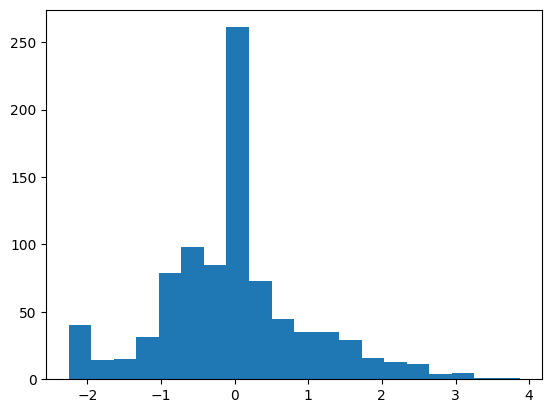

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_robust_scaled = (df - df.median()) / IQR
print(df_robust_scaled)
plt.hist(df_robust_scaled['Age'], bins=20)
